In [2]:
#second simulation window :O
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pickle
from sklearn.model_selection import train_test_split
import umap
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time
from scipy.stats import poisson
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [4]:



# Define functions to generate the data
def simulate_head(num_neuron, back_firing, peak_firing, tuning_width, data_length):
 
    hd_sim = np.random.uniform(0, 2 * np.pi, data_length)
    rf_hd = np.random.uniform(0, 2 * np.pi, num_neuron)
    rate_hd = np.zeros((num_neuron, data_length))
    spikes_hd = np.zeros((num_neuron, data_length))
 
    # Calculate the absolute difference between rf_hd and hd_sim for all neurons and time steps
    distances = np.abs(rf_hd[:, np.newaxis] - hd_sim)
 
    # Wrap distances greater than pi
    distances = np.minimum(distances, 2 * np.pi - distances)
 
    # Calculate the squared distances for all neurons and time steps
    distances_squared = distances ** 2
 
    # Calculate the response for all neurons and time steps using vectorized operations
    response = np.log(back_firing) + (np.log(peak_firing / back_firing)) * np.exp(-distances_squared / (2 * tuning_width))
 
    # Calculate rate_hd for all neurons and time steps  
    rate_hd = np.exp(response)
 
    # Generate spikes_hd using vectorized operations
    spikes_hd = np.random.poisson(lam=rate_hd)
   
    df_head = pd.DataFrame(spikes_hd.T)
    column_mapping = {col: f'head_neuron_{col}' for col in df_head.columns}
    # Rename the columns using the mapping
    df_head.rename(columns=column_mapping, inplace=True)
       
    return df_head, hd_sim





# Simulate the data for two circles
T = 3000
N = 100

num_neuron = 100
back_firing = 0.1
peak_firing = 5
tuning_width = 2
data_length = 2000
S_sim, hd_sim = simulate_head(N, back_firing, peak_firing, tuning_width, T)
print(S_sim.shape,hd_sim.shape)





(3000, 100) (3000,)


In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def simulate_head(num_neuron, back_firing, peak_firing, tuning_width, data_length):
    hd_sim = np.random.uniform(0, 2 * np.pi, data_length)
    rf_hd = np.random.uniform(0, 2 * np.pi, num_neuron)
    rate_hd = np.zeros((num_neuron, data_length))
    spikes_hd = np.zeros((num_neuron, data_length))
 
    # Calculate the absolute difference between rf_hd and hd_sim for all neurons and time steps
    distances = np.abs(rf_hd[:, np.newaxis] - hd_sim)
 
    # Wrap distances greater than pi
    distances = np.minimum(distances, 2 * np.pi - distances)
 
    # Calculate the squared distances for all neurons and time steps
    distances_squared = distances ** 2
 
    # Calculate the response for all neurons and time steps using vectorized operations
    response = np.log(back_firing) + (np.log(peak_firing / back_firing)) * np.exp(-distances_squared / (2 * tuning_width))
 
    # Calculate rate_hd for all neurons and time steps  
    rate_hd = np.exp(response)
 
    # Generate spikes_hd using vectorized operations
    spikes_hd = np.random.poisson(lam=rate_hd)
   
    df_head = pd.DataFrame(spikes_hd.T)
    column_mapping = {col: f'head_neuron_{col}' for col in df_head.columns}
    # Rename the columns using the mapping
    df_head.rename(columns=column_mapping, inplace=True)
       
    return df_head, hd_sim

def map_list_to_segments(values, num_segments=10):
    segment_indices = []
 
    for value in values:
        if value < 0:
            value = 0
        elif value >= 2 * np.pi:
            value = 2 * np.pi - 1e-6  # To ensure that 2π gets mapped to the last segment.
       
        segment_width = (2 * np.pi) / num_segments
        segment_index = int(value / segment_width)
        segment_indices.append(segment_index)
 
    return segment_indices

# Simulate the data for two circles
T = 3000
N = 100

num_neuron = 100
back_firing = 0.1
peak_firing = 5
tuning_width = 2
data_length = 2000

S_sim1, hd_sim1 = simulate_head(N, back_firing, peak_firing, tuning_width, T)
S_sim2, hd_sim2 = simulate_head(N, back_firing, peak_firing, tuning_width, T)



KeyboardInterrupt: 

In [68]:
####ONE CIRCLE

T = 3000
N = 1000

num_neuron = 100
back_firing = 1
peak_firing = 5
tuning_width = 2

S_sim1, hd_sim1 = simulate_head(N, back_firing, peak_firing, tuning_width, T)



X_scaled = StandardScaler().fit_transform(S_sim1)
 
reducer = umap.UMAP(n_neighbors=50, min_dist=1, n_components=3)
 
embedding = reducer.fit_transform(X_scaled)
 
segment_hd = map_list_to_segments(hd_sim1, len(hd_sim1))
custom_palette = sns.color_palette("husl", len(segment_hd))


# First plot
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    
    c=[custom_palette[x] for x in segment_hd], 
    s=0.5
)

# Remove the axis and grid

ax.set_aspect('auto')
plt.title('3D UMAP projection of neuron activity')
plt.show()



NameError: name 'simulate_head' is not defined

C:\Users\MASTERKILLERLORDKING\AppData\Local\Temp\ipykernel_7396\1044581973.py:49: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
C:\Users\MASTERKILLERLORDKING\AppData\Local\Temp\ipykernel_7396\1044581973.py:50: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
C:\Users\MASTERKILLERLORDKING\AppData\Local\Temp\ipykernel_7396\1044581973.py:51: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


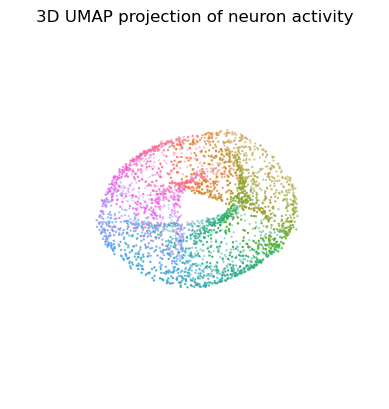

C:\Users\MASTERKILLERLORDKING\AppData\Local\Temp\ipykernel_7396\1044581973.py:78: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
C:\Users\MASTERKILLERLORDKING\AppData\Local\Temp\ipykernel_7396\1044581973.py:79: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
C:\Users\MASTERKILLERLORDKING\AppData\Local\Temp\ipykernel_7396\1044581973.py:80: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


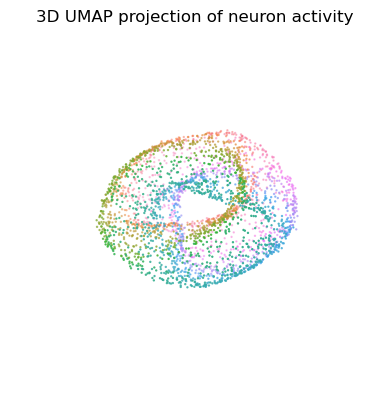

In [39]:
#TORUS BABBEI
T = 3000
N = 1000

back_firing = 0.1
peak_firing = 10
tuning_width = 2

S_sim1, hd_sim1 = simulate_head(N, back_firing, peak_firing, tuning_width, T)
S_sim2, hd_sim2 = simulate_head(N, back_firing, peak_firing, tuning_width, T)

# Concatenate the two simulations
S_sim_combined = pd.concat([S_sim1, S_sim2], axis=1)
hd_sim_combined = np.concatenate([hd_sim1, hd_sim2])

X_scaled = StandardScaler().fit_transform(S_sim_combined)
 
reducer = umap.UMAP(n_neighbors=50, min_dist=1, n_components=3)
 
embedding = reducer.fit_transform(X_scaled)
 
segment_hd = map_list_to_segments(hd_sim1, len(hd_sim1))
custom_palette = sns.color_palette("husl", len(segment_hd))

segment_hd2 = map_list_to_segments(hd_sim2, len(hd_sim2))
custom_palette2 = sns.color_palette("husl", len(segment_hd2))

# First plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[custom_palette[x] for x in segment_hd], 
    s=0.5
)

# Remove the axis and grid
ax.xaxis.line.set_lw(0.)
ax.yaxis.line.set_lw(0.)
ax.zaxis.line.set_lw(0.)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

# Set the background of each pane to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


ax.set_aspect('auto')
plt.title('3D UMAP projection of neuron activity')
plt.show()

# Second plot with axes and grid lines removed
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[custom_palette2[x] for x in segment_hd2], 
    s=0.5
)
# Remove the axis and grid
ax.xaxis.line.set_lw(0.)
ax.yaxis.line.set_lw(0.)
ax.zaxis.line.set_lw(0.)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

# Set the background of each pane to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


ax.set_aspect('auto')
plt.title('3D UMAP projection of neuron activity')
plt.show()

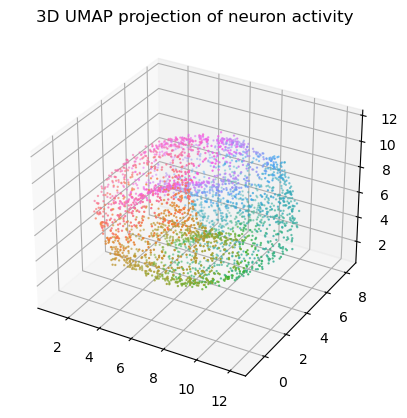

In [28]:

S_sim_combined = pd.concat([S_sim1, S_sim2], axis=1)
hd_sim_combined = np.concatenate([hd_sim1, hd_sim2])

X_scaled = StandardScaler().fit_transform(S_sim_combined)
 
reducer = umap.UMAP(n_neighbors=50, min_dist=1, n_components=3)
 
embedding = reducer.fit_transform(X_scaled)
 
segment_hd = map_list_to_segments(hd_sim1, len(hd_sim2))
custom_palette = sns.color_palette("husl", len(segment_hd))
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[custom_palette[x] for x in segment_hd], 
    s=0.5
)
ax.set_aspect('auto')
plt.title('3D UMAP projection of neuron activity')
plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def getLambdaTwoCircles(a,D):
        tc_preftheta = a[0] % (2.*np.pi) # Angles
        tc_prefphi = a[1] % (2.*np.pi)
        tc_beta = a[2] # This is a weight of the gaussian bumb
        tc_h = a[3] # This is background fire rate
        #tc_g= a[4] # Which circles does neuron belong to?
        
        tc_choose = sigmoid(a[4])
        tc_sigma = np.pi/2 ### note, HYPERPARAMETER, also the width of the bumb or variance of the normal dist. 
        
        if(len(a)>6):
            tc_sigma = a[6]
            
        distsqrds1 = CircleDist(tc_preftheta, D[:,0])
        distsqrds2 = CircleDist(tc_prefphi, D[:,1])
        bump1 = tc_beta * np.exp(-distsqrds1**2 / (2*(np.pi/2)**2))
        bump2 = tc_beta * np.exp(-distsqrds2**2 / (2*(np.pi/2)**2))
        #bump2d = tc_h + bump1 * sigmoid(tc_g) + bump2 * (1-sigmoid(tc_g))
        bump2d = tc_h + bump1 * tc_choose + bump2 * (1-tc_choose)
        return bump2d     

5.575
